C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

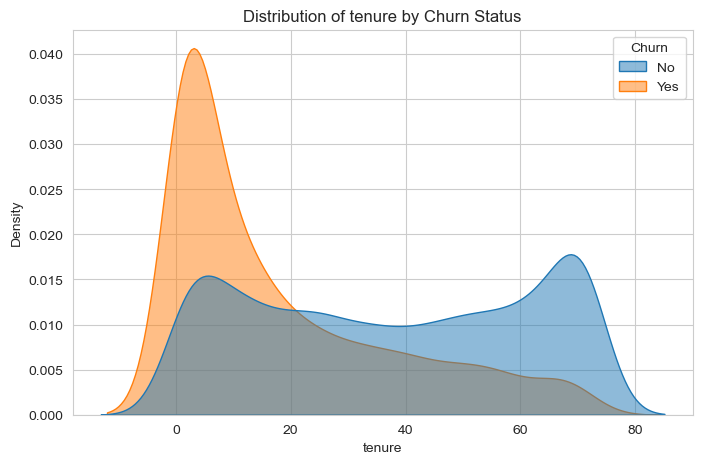

C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

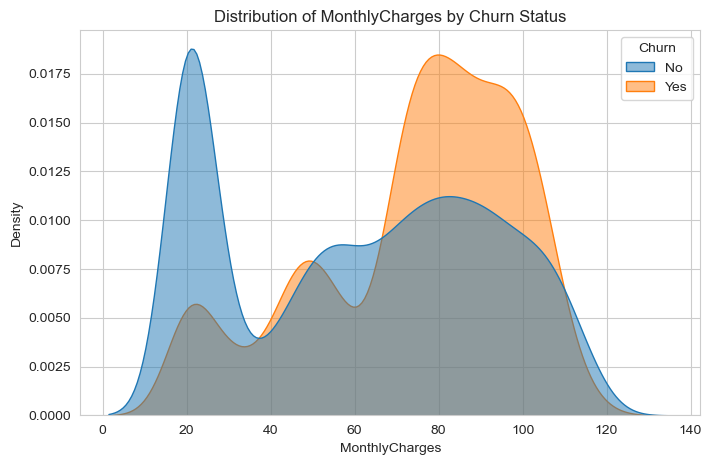

C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

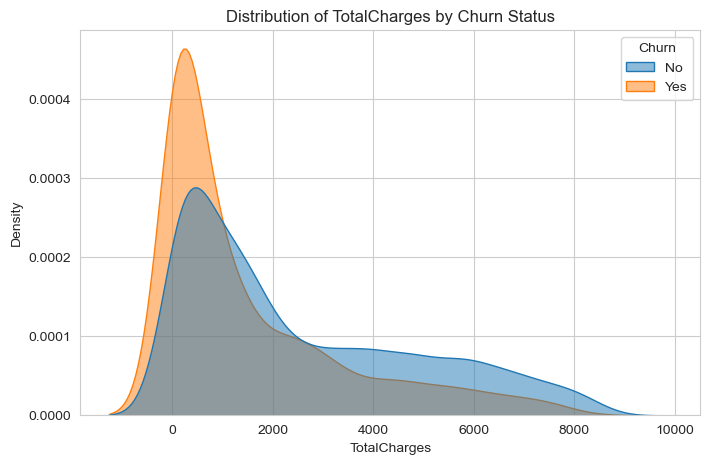

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('data/telco_churn_cleaned.csv')

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

sns.set_style('whitegrid')

for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.kdeplot(data=data, x=col, hue='Churn', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Distribution of {col} by Churn Status')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()


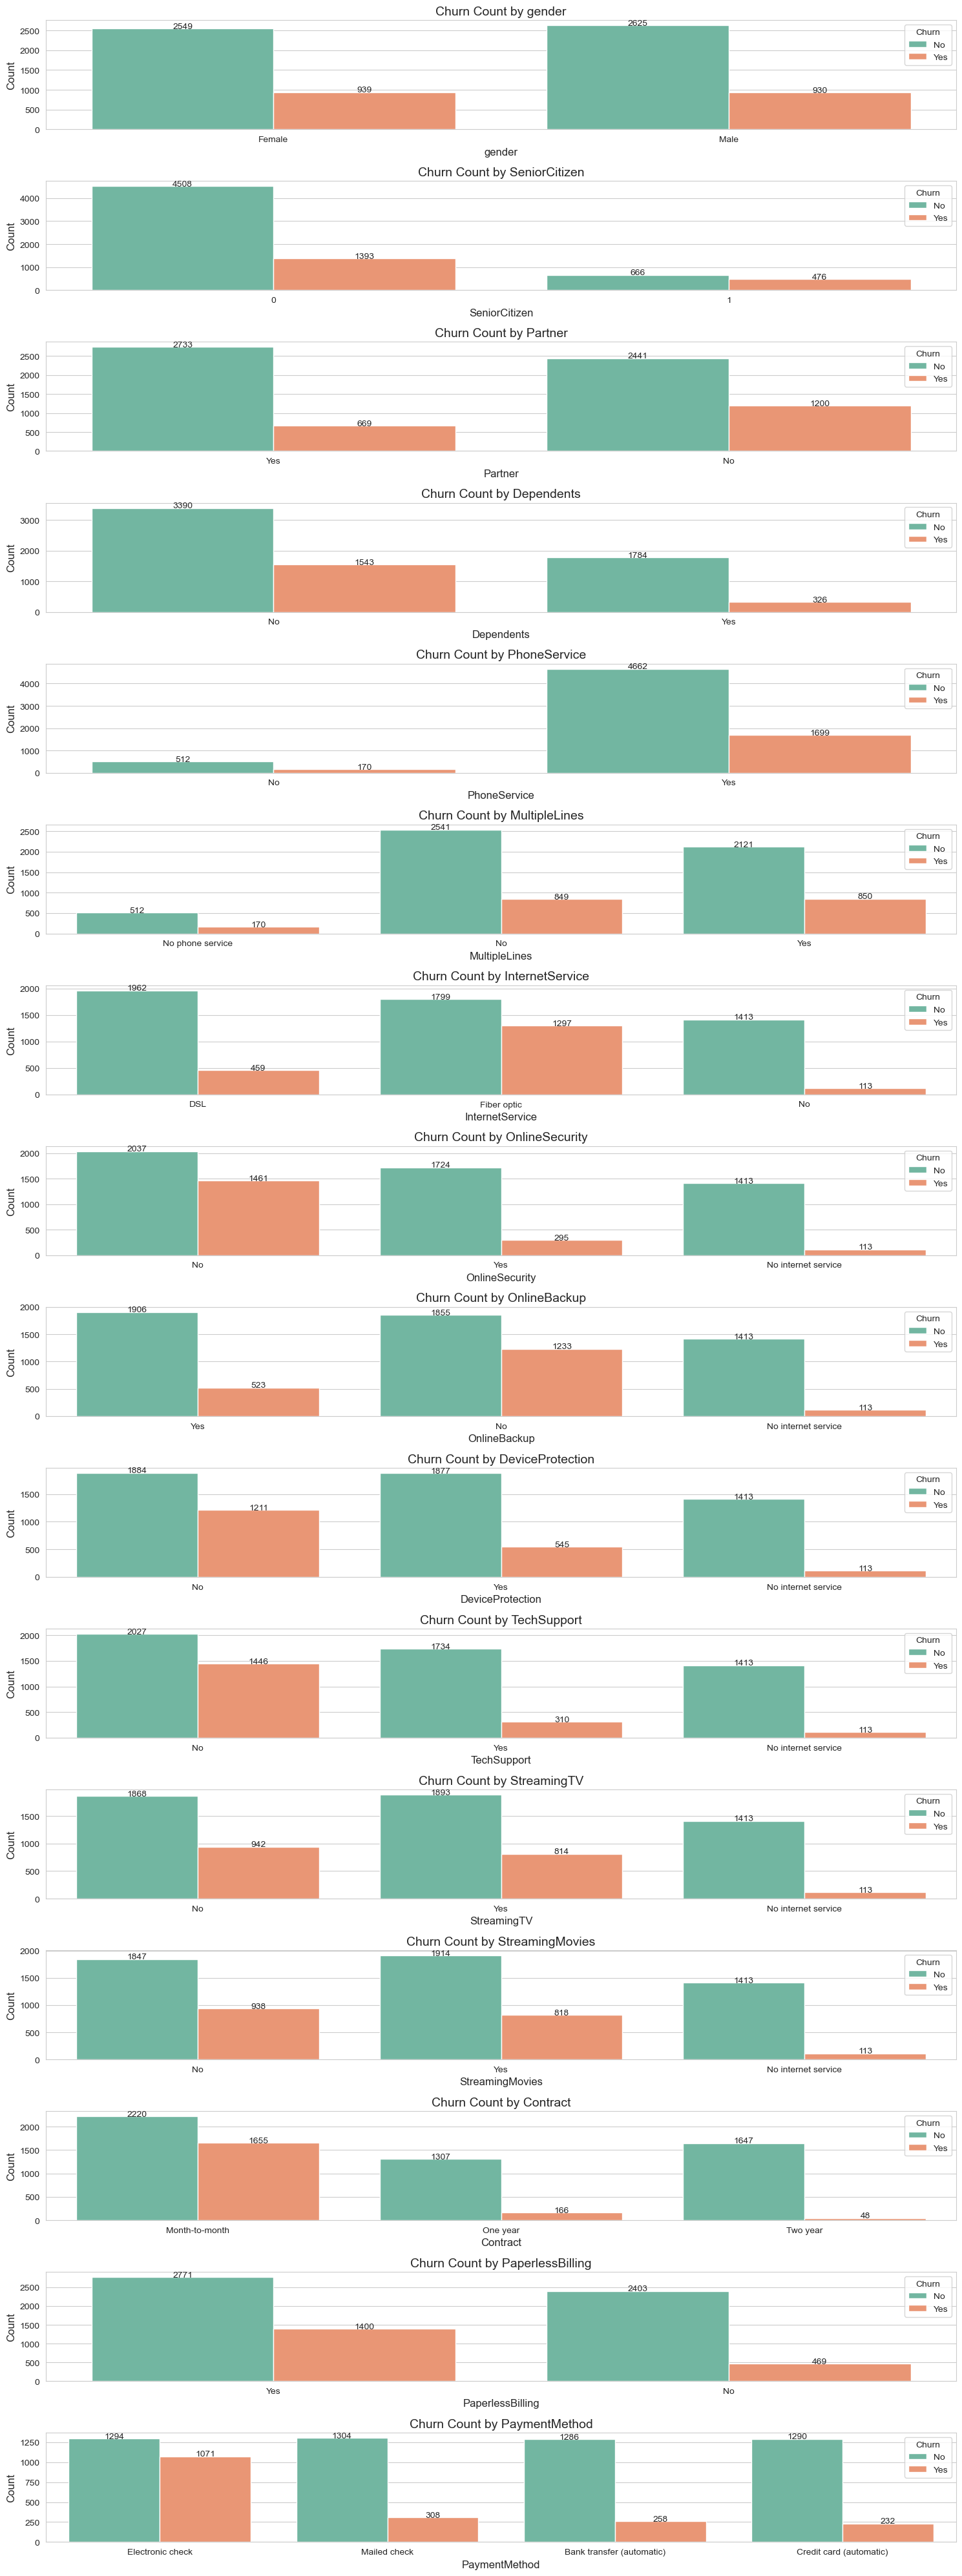

In [4]:
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

plt.figure(figsize=(15, 40))  

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    ax = sns.countplot(data=data, x=col, hue='Churn', palette='Set2')
    plt.title(f'Churn Count by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    #shows count numbers on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}', ha="center")

plt.tight_layout()
plt.show()

Correlation matrix:
                   tenure  MonthlyCharges  TotalCharges  Churn_num
tenure          1.000000        0.247900      0.826178  -0.352229
MonthlyCharges  0.247900        1.000000      0.651174   0.193356
TotalCharges    0.826178        0.651174      1.000000  -0.198324
Churn_num      -0.352229        0.193356     -0.198324   1.000000


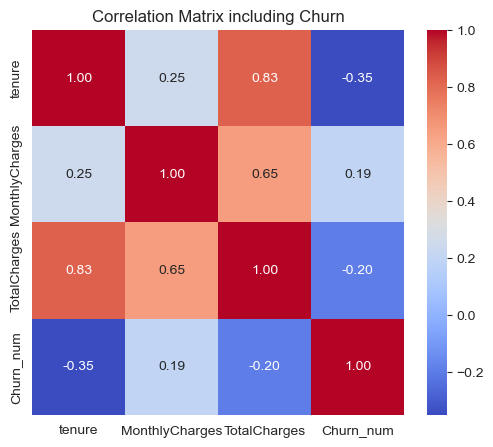

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#'Churn' to numeric
data['Churn_num'] = data['Churn'].map({'No': 0, 'Yes': 1})

# numerical columns for correlation
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_num']

# correlation matrix
corr_matrix = data[numerical_cols].corr()
print("Correlation matrix:\n", corr_matrix)
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix including Churn')
plt.show()


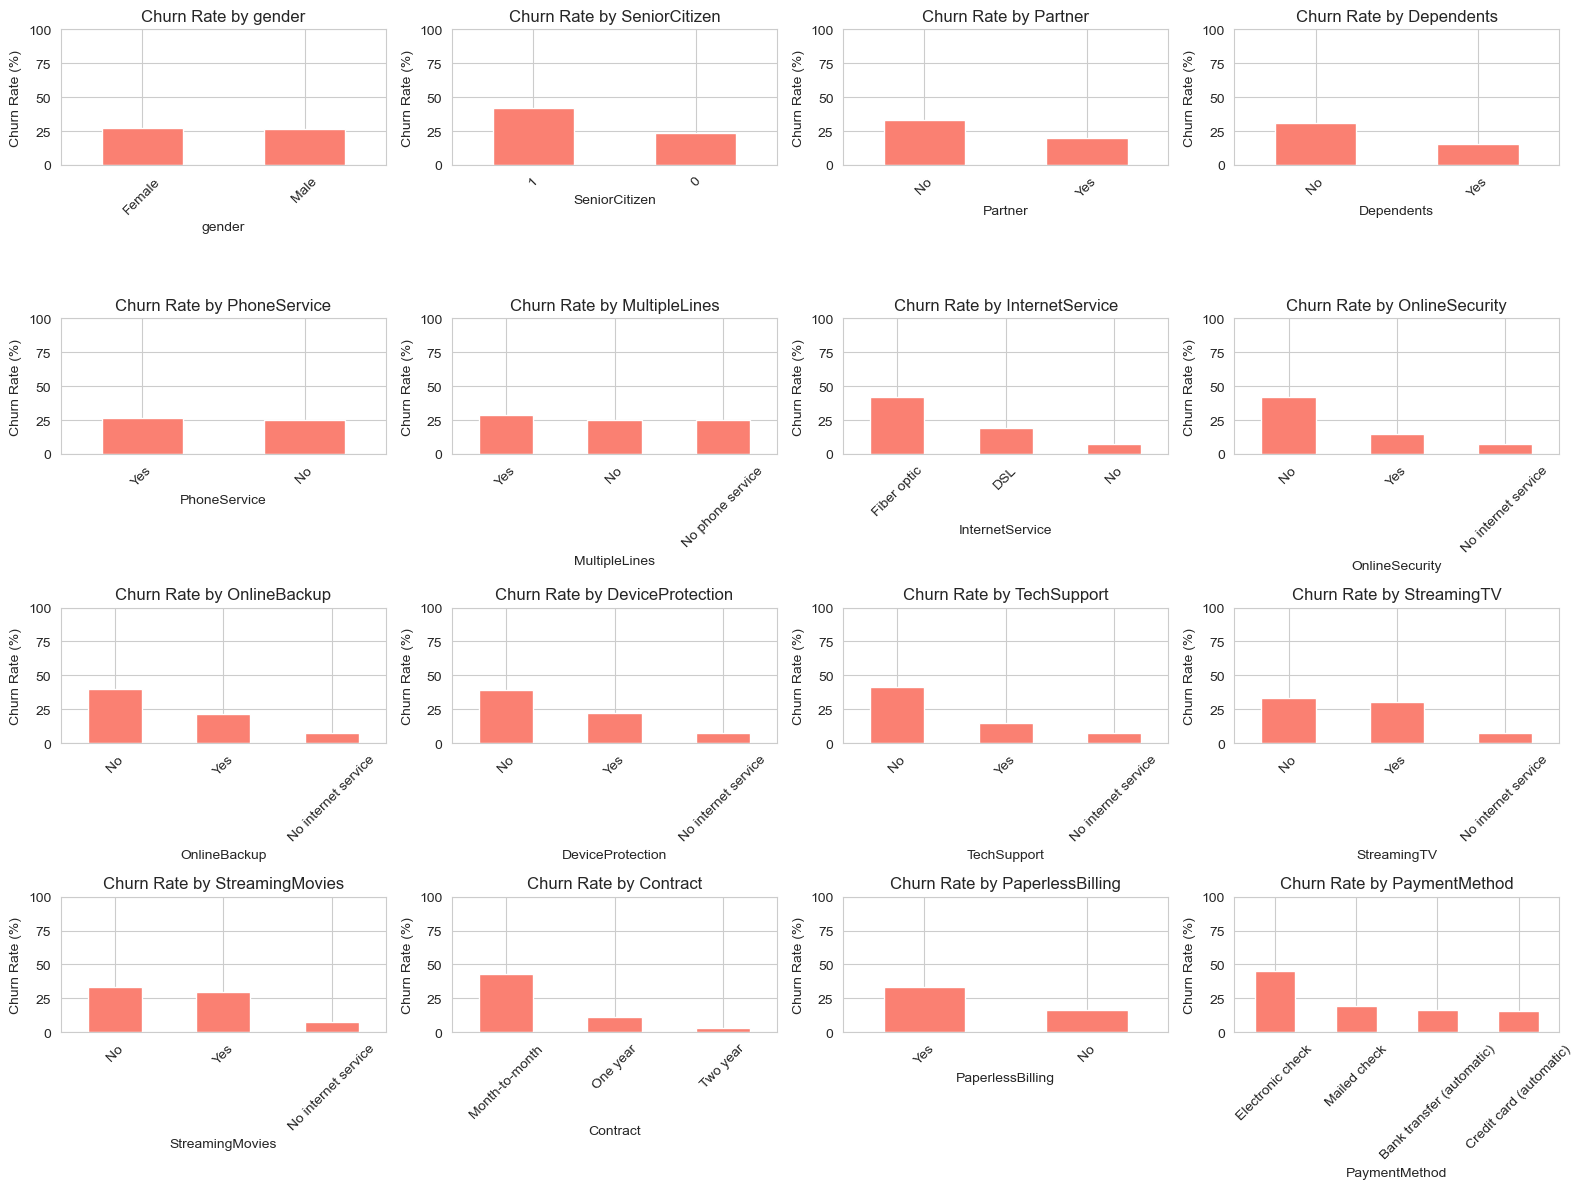

In [8]:
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
            'Contract', 'PaperlessBilling', 'PaymentMethod']

# Calculates churn rate by category and plot it
plt.figure(figsize=(16, 12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 4, i)  # 4x4 grid of plots
    # Calculate churn percentage by category
    churn_rate = data.groupby(col)['Churn'].apply(lambda x: (x=='Yes').mean()*100)
    churn_rate.sort_values(ascending=False).plot(kind='bar', color='salmon')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate (%)')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\vivek\AppData\Local\Temp\ipykernel_7368\3626814796.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = data.groupby('tenure_group')['Churn'].apply(lambda x: (x=='Yes').mean() * 100).reset_index()
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


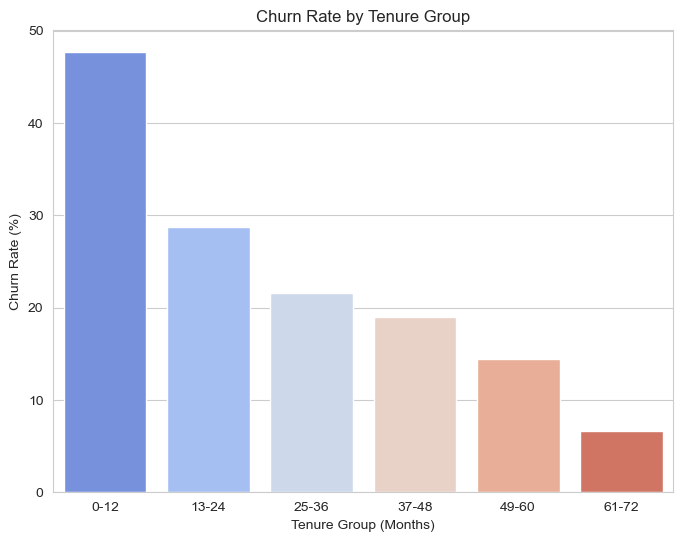

In [11]:
#tenure buckets
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
data['tenure_group'] = pd.cut(data['tenure'], bins=bins, labels=labels, right=True)

#churn rate per tenure group
churn_rates = data.groupby('tenure_group')['Churn'].apply(lambda x: (x=='Yes').mean() * 100).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='tenure_group', y='Churn', data=churn_rates, palette='coolwarm')
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Churn Rate (%)')
plt.show()
